In [1]:
import os 
import pandas as pd
#import gmaps
import requests
import matplotlib.pyplot as plt
import requests
from pprint import pprint
import gmaps

from config import Api_Key

In [2]:
# Configure gmaps
gmaps.configure(api_key=Api_Key)

In [3]:
file = "Resources/Road_Crashes_for_five_Years_-_Victoria.csv"

main_df = pd.read_csv(file)

main_df.head()


,X,Y,objectid,accident_no,abs_code,accident_status,accident_date,date_value,Daily_Rainfall,accident_time,...,deg_urban_all,lga_name_all,region_name_all,srns,srns_all,rma,rma_all,divided,divided_all,stat_div_name
0,2498217.170,2454870.252,1,T20140013514,ABS to receive accident,Unfinished,1/7/2014,41821,0.6,13:09:00,...,TOWNS,MITCHELL,NORTHERN REGION,B,B,Arterial Highway,"Local Road,Arterial Highway",Undivided,Undivided,Country
1,2502934.960,2423005.289,2,T20140013549,ABS to receive accident,Finished,2/7/2014,41822,0.0,0:01:00,...,MELB_URBAN,WHITTLESEA,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,Arterial Other,Undivided,Undivided,Metro
2,2520154.039,2395621.674,3,T20140013561,ABS to receive accident,Finished,2/7/2014,41822,0.0,8:30:00,...,MELB_URBAN,KNOX,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro
3,2473719.463,2402357.319,4,T20140013563,ABS to receive accident,Finished,2/7/2014,41822,0.0,10:08:00,...,MELB_URBAN,WYNDHAM,METROPOLITAN NORTH WEST REGION,C,C,Arterial Other,"Arterial Other,Local Road",Divided,"Undivided,Divided",Metro
4,2484073.998,2409123.682,5,T20140013567,ABS to receive accident,Finished,2/7/2014,41822,0.0,9:12:00,...,MELB_URBAN,WYNDHAM,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Metro


In [4]:
#Print a list of columns, so we can find out which column we need
print(main_df.columns.tolist())

['X', 'Y', 'objectid', 'accident_no', 'abs_code', 'accident_status', 'accident_date', 'date_value', 'Daily_Rainfall', 'accident_time', 'alcoholtime', 'accident_type', 'day_of_week', 'dca_code', 'hit_run_flag', 'light_condition', 'police_attend', 'road_geometry', 'severity', 'speed_zone', 'run_offroad', 'node_id', 'longitude', 'latitude', 'node_type', 'lga_name', 'region_name', 'vicgrid_x', 'vicgrid_y', 'total_persons', 'inj_or_fatal', 'fatality', 'seriousinjury', 'otherinjury', 'noninjured', 'males', 'females', 'bicyclist', 'passenger', 'driver', 'pedestrian', 'pillion', 'motorist', 'unknown', 'ped_cyclist_5_12', 'ped_cyclist_13_18', 'old_pedestrian', 'old_driver', 'young_driver', 'alcohol_related', 'unlicencsed', 'no_of_vehicles', 'heavyvehicle', 'passengervehicle', 'motorcycle', 'publicvehicle', 'deg_urban_name', 'deg_urban_all', 'lga_name_all', 'region_name_all', 'srns', 'srns_all', 'rma', 'rma_all', 'divided', 'divided_all', 'stat_div_name']


In [5]:
#Hey guys, i've created a new DataFrame, and took out some of the columns. 
#Feel free to delete more, I didn't limit the columns to our discussed topics, as there maybe more ideas later and we may use the extra columns

crash_df = main_df[['accident_no',  'accident_date', 'date_value', 
                      'Daily_Rainfall', 'accident_time', 'alcoholtime', 
                      'accident_type', 'day_of_week', 'dca_code', 
                      'hit_run_flag', 'light_condition', 'police_attend', 
                      'road_geometry', 'severity', 'speed_zone', 
                      'run_offroad', 'longitude', 'latitude', 
                      'lga_name', 'region_name', 'total_persons', 
                      'inj_or_fatal', 'fatality', 'seriousinjury', 
                      'otherinjury', 'noninjured', 
                      'males', 'females',  
                      'alcohol_related','stat_div_name']]

In [6]:
crash_df.head()

,accident_no,accident_date,date_value,Daily_Rainfall,accident_time,alcoholtime,accident_type,day_of_week,dca_code,hit_run_flag,...,total_persons,inj_or_fatal,fatality,seriousinjury,otherinjury,noninjured,males,females,alcohol_related,stat_div_name
0,T20140013514,1/7/2014,41821,0.6,13:09:00,No,Collision with vehicle,Monday,RIGHT THROUGH,No,...,4.0,1.0,0.0,0.0,1.0,3.0,1.0,3.0,No,Country
1,T20140013549,2/7/2014,41822,0.0,0:01:00,Yes,Collision with vehicle,Wednesday,U TURN,No,...,4.0,3.0,0.0,0.0,3.0,1.0,0.0,3.0,No,Metro
2,T20140013561,2/7/2014,41822,0.0,8:30:00,No,collision with some other object,Wednesday,STRUCK OBJECT ON CARRIAGEWAY,No,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,No,Metro
3,T20140013563,2/7/2014,41822,0.0,10:08:00,No,Collision with vehicle,Wednesday,CROSS TRAFFIC(INTERSECTIONS ONLY),Yes,...,3.0,1.0,0.0,0.0,1.0,2.0,2.0,1.0,No,Metro
4,T20140013567,2/7/2014,41822,0.0,9:12:00,No,Collision with vehicle,Wednesday,RIGHT THROUGH,No,...,2.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,No,Metro


In [7]:
#---------Proposed topics---------
#-       Suburb vs accident numbers, display on Gmap (AJ)
#-       Days of the week vs Accident numbers (SK)
#-       Number of accident vs suburb (AJ)
#-       Number of accident vs Region 
#-       Light condition (groupby) vs number of accident... 
#                 -what else could be closely related to light condition (Corrolation/Linea regression)
#-       Nearest hospital vs suburbs that have the highest accident (Google Place API, Gmap) (JD)
#-       Multi-line plot for Type of accident, over the 5 years (AJ)
#-       Alcohol vs Dead end ["road_geometry"] (for fun!) (KK)
#-       Rainfall vs accident numbers (SK)
#-       Rainfall vs hit and run (KK)

In [8]:
#-----Jing's Part-------
#-       Light condition vs number of accident... 

In [9]:
#Select only collumn required for Jing's part of analaysis
light_df = crash_df[['accident_no',  'accident_date', 'date_value', 
                      'accident_type',  'dca_code', 
                      'light_condition','longitude', 'latitude', 
                      'lga_name', 'region_name']]

In [10]:
print(len(light_df))

77513


In [11]:
light_accid_df = pd.DataFrame(light_df["light_condition"].value_counts())

In [12]:
light_accid_df=light_accid_df.rename(columns = {"light_condition" : "No of Accident"})

In [13]:
light_accid_df.reset_index()

,index,No of Accident
0,Day,51859
1,Dark Street lights on,11716
2,Dusk/Dawn,6642
3,Dark No street lights,4295
4,Unk.,2033
5,Dark Street lights unknown,805
6,Dark Street lights off,163


Text(0, 0.5, 'Number of Accidents')

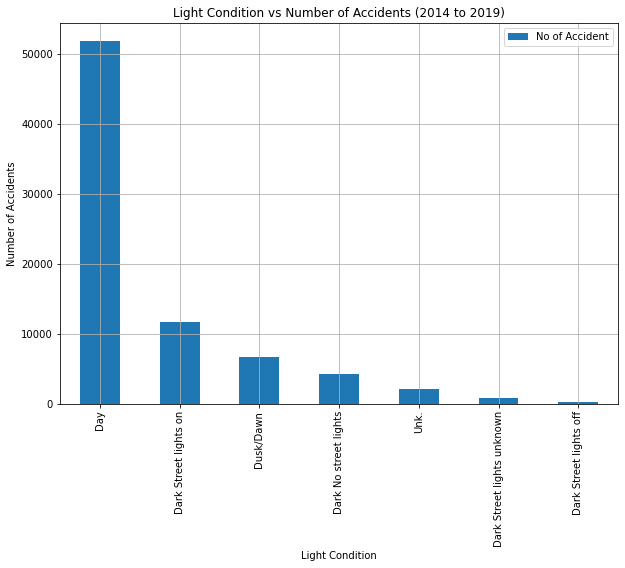

In [14]:
light_chart =light_accid_df.plot(kind="bar", 
                                 grid=True, 
                                 title="Light Condition vs Number of Accidents (2014 to 2019)", 
                                 figsize=(10,7))
light_chart.set_xlabel("Light Condition")
light_chart.set_ylabel("Number of Accidents")
#plt.tight_layout()

In [15]:
#-       Nearest medical centre vs suburbs that have the highest accident (Google Place API, Gmap) (JD)

In [16]:
suburb_df = crash_df[['accident_no',  'accident_date', 'date_value', 
                      'accident_type',  'dca_code', 
                      'light_condition','longitude', 'latitude', 
                      'lga_name', 'region_name']]

In [17]:
#Remove rows without Longitude and Latitude (including those with "-1" value)
suburb_df_LatLng_cleaned = suburb_df.dropna()
suburb_df_LatLng_cleaned = suburb_df_LatLng_cleaned.loc[(suburb_df_LatLng_cleaned["longitude"] != -1)]

In [18]:
suburb_df_LatLng_cleaned.head(50)

,accident_no,accident_date,date_value,accident_type,dca_code,light_condition,longitude,latitude,lga_name,region_name
0,T20140013514,1/7/2014,41821,Collision with vehicle,RIGHT THROUGH,Day,144.979861,-37.406699,MITCHELL,NORTHERN REGION
5,T20140013582,2/7/2014,41822,Collision with a fixed object,OFF RIGHT BEND INTO OBJECT/PARKED VEHICLE,Day,144.962062,-37.842131,PORT PHILLIP,METROPOLITAN NORTH WEST REGION
6,T20140013503,1/7/2014,41821,Collision with vehicle,CROSS TRAFFIC(INTERSECTIONS ONLY),Day,144.904287,-37.753077,MOONEE VALLEY,METROPOLITAN NORTH WEST REGION
7,T20140013532,1/7/2014,41821,Collision with vehicle,REAR END(VEHICLES IN SAME LANE),Dusk/Dawn,145.273192,-38.006269,CASEY,METROPOLITAN SOUTH EAST REGION
8,T20140013578,2/7/2014,41822,Collision with vehicle,CROSS TRAFFIC(INTERSECTIONS ONLY),Day,142.161220,-34.189796,MILDURA,WESTERN REGION
10,T20140013597,2/7/2014,41822,Struck Pedestrian,FAR SIDE. PED HIT BY VEHICLE FROM THE LEFT,Day,145.089723,-37.586355,WHITTLESEA,METROPOLITAN NORTH WEST REGION
12,T20140013533,1/7/2014,41821,Collision with vehicle,REAR END(VEHICLES IN SAME LANE),Dark Street lights on,144.939569,-37.783539,MELBOURNE,METROPOLITAN NORTH WEST REGION
17,T20140013632,1/7/2014,41821,Collision with vehicle,RIGHT NEAR (INTERSECTIONS ONLY),Dusk/Dawn,144.963044,-37.737375,MORELAND,METROPOLITAN NORTH WEST REGION
18,T20140013642,2/7/2014,41822,Struck Pedestrian,FAR SIDE. PED HIT BY VEHICLE FROM THE LEFT,Dark Street lights on,144.668469,-37.852607,WYNDHAM,METROPOLITAN NORTH WEST REGION
20,T20140013516,1/7/2014,41821,Collision with vehicle,LEFT FAR (INTERSECTIONS ONLY),Day,145.236036,-37.912528,KNOX,METROPOLITAN SOUTH EAST REGION


In [19]:
#suburb_df_LatLng_cleaned["longitude"].value_counts()

In [20]:
suburb_accid_df = pd.DataFrame(suburb_df_LatLng_cleaned["lga_name"].value_counts())
suburb_accid_df=suburb_accid_df.rename(columns = {"lga_name" : "Number of Accident"})

In [21]:
suburb_accid_df.head(50)

,Number of Accident
MELBOURNE,3803
CASEY,3005
GEELONG,2875
DANDENONG,2399
HUME,2396
BRIMBANK,2181
WHITTLESEA,2172
YARRA RANGES,2147
MONASH,2142
MORELAND,2005


In [22]:
first_10_df = suburb_accid_df.head(10)

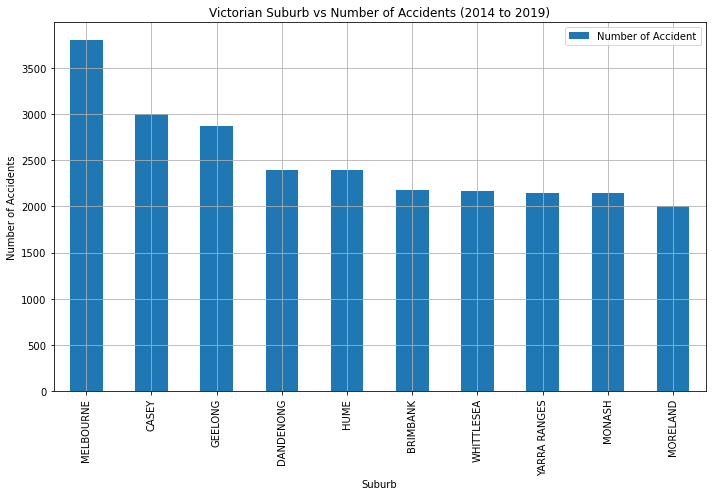

In [23]:
first_10_chart =first_10_df.plot(kind="bar", 
                                 grid=True, 
                                 title="Victorian Suburb vs Number of Accidents (2014 to 2019)", 
                                 figsize=(10,7))
first_10_chart.set_xlabel("Suburb")
first_10_chart.set_ylabel("Number of Accidents")
plt.tight_layout()

In [24]:
reset_first10 = first_10_df.reset_index().copy()
reset_first10.head(10)

,index,Number of Accident
0,MELBOURNE,3803
1,CASEY,3005
2,GEELONG,2875
3,DANDENONG,2399
4,HUME,2396
5,BRIMBANK,2181
6,WHITTLESEA,2172
7,YARRA RANGES,2147
8,MONASH,2142
9,MORELAND,2005


In [25]:
#Add Latitude and Longitude of the cities
reset_first10["Latitude"] = ""
reset_first10["Longitude"] = ""
reset_first10["Closest Medical Centre"] = ""
reset_first10["Address"]=""

In [26]:
city = reset_first10["index"]+",Victoria,AU"

In [27]:
index1=0
for x in city:
    
    # Build the endpoint URL
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?''address={0}&key={1}').format(x, Api_Key)
    
    geo_data = requests.get(target_url).json()
    
    results = geo_data["results"]
    

    reset_first10.loc[index1, "Latitude"] = results[0]["geometry"]["location"]["lat"]
    reset_first10.loc[index1, "Longitude"] = results[0]["geometry"]["location"]["lng"]
    
    print(x+ str(results[0]["geometry"]["location"]["lat"]) + str(results[0]["geometry"]["location"]["lng"]))

    index1+=1

MELBOURNE,Victoria,AU-37.8136276144.9630576
CASEY,Victoria,AU-38.1105316145.2922335
GEELONG,Victoria,AU-38.1499181144.3617186
DANDENONG,Victoria,AU-37.9847811145.2139907
HUME,Victoria,AU-37.5986911144.8291259
BRIMBANK,Victoria,AU-37.7594793144.8071366
WHITTLESEA,Victoria,AU-37.513889145.113889
YARRA RANGES,Victoria,AU-37.7450808145.7133909
MONASH,Victoria,AU-37.9015913145.1155133
MORELAND,Victoria,AU-37.7240653144.9501708


In [28]:
reset_first10.head(50)

,index,Number of Accident,Latitude,Longitude,Closest Medical Centre,Address
0,MELBOURNE,3803,-37.8136,144.963,,
1,CASEY,3005,-38.1105,145.292,,
2,GEELONG,2875,-38.1499,144.362,,
3,DANDENONG,2399,-37.9848,145.214,,
4,HUME,2396,-37.5987,144.829,,
5,BRIMBANK,2181,-37.7595,144.807,,
6,WHITTLESEA,2172,-37.5139,145.114,,
7,YARRA RANGES,2147,-37.7451,145.713,,
8,MONASH,2142,-37.9016,145.116,,
9,MORELAND,2005,-37.7241,144.95,,


In [29]:
# geocoordinates
target_radius = 5000
target_type = "hospital"

# set up a parameters dictionary
params = {"radius": target_radius,
    "type": target_type,
    "key": Api_Key
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
params["location"]= "-37.5987, 144.829"

# run a request using our params dictionary, test the API works
response = requests.get(base_url, params=params)
response_json=response.json()
pprint(response_json)


{'html_attributions': [], 'results': [], 'status': 'ZERO_RESULTS'}


In [30]:
for index, row in reset_first10.iterrows():
    # base url
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    lat=row["Latitude"]
    lng=row["Longitude"]
    params["location"] = f"{lat},{lng}"
    response = requests.get(base_url, params=params)
    response_json=response.json()
    results = response_json["results"]
    #pprint(results)
    #print(index)
    
    
    try:
        reset_first10.loc[index, "Closest Medical Centre"] = results[0]["name"]
        reset_first10.loc[index, "Address"] = results[0]["vicinity"]
        print("Finding nearst medical center in " + row["index"])
    except:
        print(row["index"] + " not found!")
        
    print("============================")

Finding nearst medical center in MELBOURNE
Finding nearst medical center in CASEY
Finding nearst medical center in GEELONG
Finding nearst medical center in DANDENONG
HUME not found!
Finding nearst medical center in BRIMBANK
Finding nearst medical center in WHITTLESEA
Finding nearst medical center in YARRA RANGES
Finding nearst medical center in MONASH
Finding nearst medical center in MORELAND


In [31]:
reset_first10.head(10)

,index,Number of Accident,Latitude,Longitude,Closest Medical Centre,Address
0,MELBOURNE,3803,-37.8136,144.963,Era Health Doctor Melbourne CBD,"Level 9/460 Bourke Street, Melbourne"
1,CASEY,3005,-38.1105,145.292,Blood Bank,"65 Berwick-Cranbourne Road, Cranbourne East"
2,GEELONG,2875,-38.1499,144.362,Dr. Natalie Harrison,"248 Malop Street, Geelong"
3,DANDENONG,2399,-37.9848,145.214,Dandenong Hospital,"135 David Street, Dandenong"
4,HUME,2396,-37.5987,144.829,,
5,BRIMBANK,2181,-37.7595,144.807,Western Health,"Furlong Road, St Albans"
6,WHITTLESEA,2172,-37.5139,145.114,Whittlesea Family Medical Centre,"4 Macmeikan Street, Whittlesea"
7,YARRA RANGES,2147,-37.7451,145.713,Warburton Medical Group,"3476 Warburton Highway, Warburton"
8,MONASH,2142,-37.9016,145.116,Monash Chiropractic Centre,"237 Ferntree Gully Road, Mount Waverley"
9,MORELAND,2005,-37.7241,144.95,Dorset Rehabilitation Centre,"146 Derby Street, Pascoe Vale"


In [32]:
# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Closest Medical Centre}</dd>
<dt>Address</dt><dd>{Address}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
medical_info1 = [info_box_template.format(**row) for index, row in reset_first10.iterrows()]
locations = reset_first10[["Latitude", "Longitude"]]

In [33]:
city = reset_first10["Number of Accident"] / 100
print(city)

0    38.03
1    30.05
2    28.75
3    23.99
4    23.96
5    21.81
6    21.72
7    21.47
8    21.42
9    20.05
Name: Number of Accident, dtype: float64


In [34]:
# Plot Heatmap
fig = gmaps.figure(map_type="TERRAIN")

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=city, 
                                 dissipating=False, max_intensity=1000,
                                 point_radius=1)

#Add layer
fig.add_layer(heat_layer)

# Create symbol layer

symbol_layer = gmaps.marker_layer(locations, hover_text='', 
                      info_box_content=medical_info1 , display_info_box=None, label='')



fig.add_layer(symbol_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [35]:
#========End of Jing's part============

In [36]:
#googlemap No Acci vs City